Méthode de dichotomie 
resolution de fonction f(x)=0 . une fonction continue sur [a,b ]. la condition est d'avoir f(a)*f(b)< 0

In [1]:
def bisection(f, a, b, epsilon=1e-6):
    """
    Trouve un zéro de la fonction f dans l'intervalle [a, b] par la méthode de la dichotomie.

    Args:
        f (function): La fonction dont on cherche un zéro.
        a (float): Borne inférieure de l'intervalle.
        b (float): Borne supérieure de l'intervalle.
        epsilon (float): Précision souhaitée (par défaut 1e-6).

    Returns:
        float: Une approximation du zéro de la fonction dans [a, b].
    """
    if f(a) * f(b) >= 0:
        raise ValueError("La fonction doit changer de signe sur l'intervalle [a, b].")

    while abs(b - a) > epsilon:
        m = (a + b) / 2
        fm = f(m)

        if f(a) * fm < 0:
            b = m  # Le zéro est dans [a, m]
        else:
            a = m  # Le zéro est dans [m, b]

    return (a + b) / 2  # Retourne le milieu de l'intervalle final

# Exemple d'utilisation
def f(x):
    return x**2 - 2  # Fonction dont on cherche un zéro (racine carrée de 2)

a = 1.0
b = 2.0
epsilon = 1e-6

try:
    zero = bisection(f, a, b, epsilon)
    print(f"Un zéro de la fonction est approximativement : {zero:.6f}")
except ValueError as e:
    print(e)


Un zéro de la fonction est approximativement : 1.414214


C:\Users\SCD UM\AppData\Local\Temp\ipykernel_2168\336044686.py:9: RuntimeWarning: invalid value encountered in sqrt
  ellipse_y = np.sqrt(b**2 * (1 - x**2 / a**2))
C:\Users\SCD UM\AppData\Local\Temp\ipykernel_2168\336044686.py:10: RuntimeWarning: invalid value encountered in sqrt
  hyperbola_y = np.sqrt(b**2 * (x**2 / a**2 - 1))


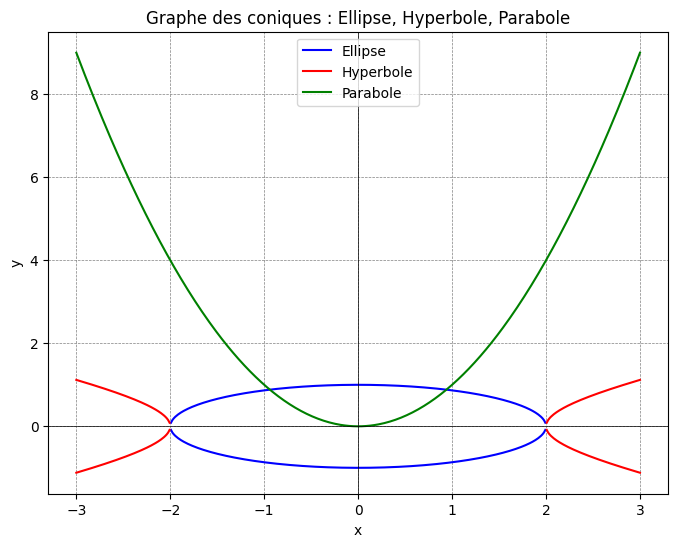

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Définir les valeurs de x
x = np.linspace(-3, 3, 400)

# Équations des courbes
a, b = 2, 1
ellipse_y = np.sqrt(b**2 * (1 - x**2 / a**2))
hyperbola_y = np.sqrt(b**2 * (x**2 / a**2 - 1))
parabola_y = x**2

# Tracer les courbes
plt.figure(figsize=(8, 6))
plt.plot(x, ellipse_y, 'b-', label='Ellipse')
plt.plot(x, -ellipse_y, 'b-')
plt.plot(x, hyperbola_y, 'r-', label='Hyperbole')
plt.plot(x, -hyperbola_y, 'r-')
plt.plot(x, parabola_y, 'g-', label='Parabole')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.title("Graphe des coniques : Ellipse, Hyperbole, Parabole")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


Exercice 3
le code python pour minimiser une foncton

In [1]:
import numpy as np
# définition de fonction pour minimiser f(x)=x^2+5x+2
def f(x):
    return x**2 + 5*x + 2

def df(x):
    return 2*x + 5

def gradient_descent(grad, x0, lr=0.1, max_iter=1000, tol=1e-6):
    x = np.array(x0, dtype=float)# initialisation
    history = [x.copy()]# pour stocker l'historique des points
    for k in range(max_iter):
        g = grad(x)
        x_new = x - lr * g
        history.append(x_new.copy())
        if np.linalg.norm(x_new - x) < tol:# critère de convergence
         print("Convergence atteinte après", k+1, "itérations.")
         break
        x = x_new
    return np.array(history)
# initialisation
x0 = 0.0 # point de départ
learning_rate = 0.1 # taux d'apprentissage
max_iterations = 1000 # nombre maximum d'itérations
tolerance = 1e-6 # tolérance
# exécution de la descente de gradient
history = gradient_descent(df, x0, lr=learning_rate, max_iter=max_iterations, tol=tolerance)
# affichage des résultats
print("Point minimum approché :", history[-1])

Convergence atteinte après 60 itérations.
Point minimum approché : -2.4999961687611476


Exercice 4
discrétisation différence fine

In [ ]:
import numpy as np

def gradient_descent(J, grad_J, x0, rho=0.01, epsilon=1e-6, niter_max=1000):
    """
    Méthode de descente de gradient pour minimiser une fonction J(x).

    Paramètres :
    - J : Fonction à minimiser (J: ℝⁿ → ℝ).
    - grad_J : Gradient de J (∇J: ℝⁿ → ℝⁿ).
    - x0 : Point de départ (vecteur de taille n).
    - rho : Taux d'apprentissage (pas de descente).
    - epsilon : Tolérance pour le critère d'arrêt (||∇J(xn)|| < epsilon).
    - niter_max : Nombre maximal d'itérations.

    Retourne :
    - x : Point minimisant J(x).
    - trajectory : Liste des points x à chaque itération.
    - grad_norms : Liste des normes du gradient à chaque itération.
    """
    x = np.array(x0, dtype='float64')# initialisation
    trajectory = [x.copy()]# pour stocker l'historique des points
    grad_norms = []# pour stocker les normes du gradient

    for niter in range(niter_max):# boucle principale
        grad = grad_J(x)# calcul du gradient
        grad_norm = np.linalg.norm(grad)# norme du gradient
        grad_norms.append(grad_norm)# stockage de la norme du gradient

        if grad_norm < epsilon:# critère de convergence
            print(f"Convergence atteinte après {niter} itérations.")
            break

        x -= rho * grad# mise à jour de x
        trajectory.append(x.copy())# pour stocker l'historique des points

    return x, np.array(trajectory), np.array(grad_norms)

# Exemple d'utilisation
if __name__ == "__main__":
    # Définir une fonction J(x) = ||x||^2 (exemple simple)
    def J(x):
        return np.linalg.norm(x)**2

    # Définir le gradient de J
    def grad_J(x):
        return 2 * x

    # Point de départ
    x0 = np.array([3.0, 4.0])

    # Exécuter la descente de gradient
    x_min, trajectory, grad_norms = gradient_descent(J, grad_J, x0, rho=0.1, epsilon=1e-6)

    print("Point minimisant J(x) :", x_min)
    print("Valeur minimale de J(x) :", J(x_min))


Convergence atteinte après 73 itérations.
Point minimisant J(x) : [2.52749500e-07 3.36999333e-07]
Valeur minimale de J(x) : 1.7745086042373237e-13


exercice 3

Convergence atteinte après 144 itérations.
Point minimisant f(x) : [-0.31622732 -0.63245576]
Valeur minimale de f(x) : -0.9590091777079827


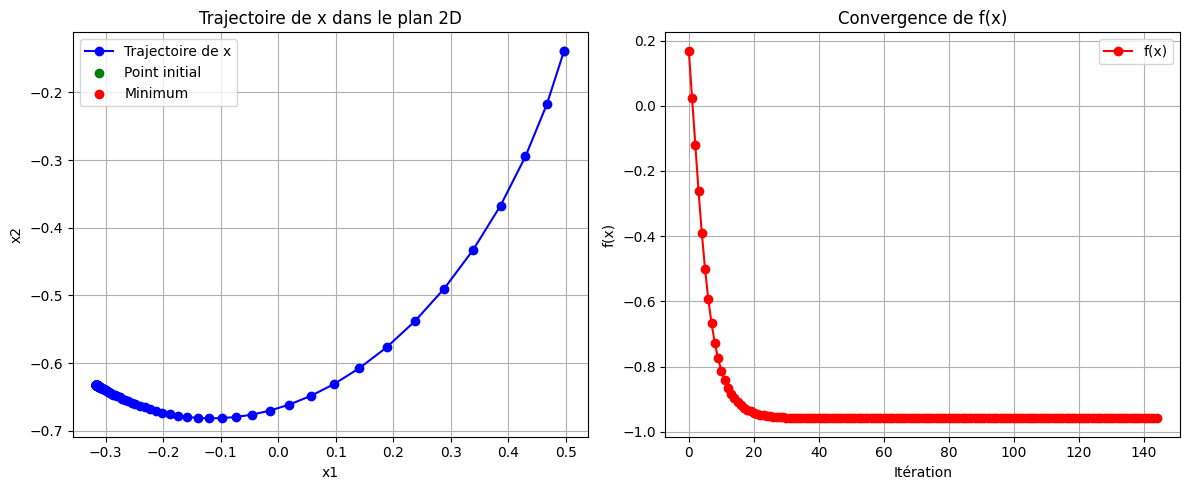

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    """Calcule f(x) = <x, y> * exp(-||x||^2)"""
    return np.dot(x, y) * np.exp(-np.linalg.norm(x)**2)

def grad_f(x, y):
    """Calcule le gradient de f(x) = <x, y> * exp(-||x||^2)"""
    norm_x_squared = np.linalg.norm(x)**2
    exp_term = np.exp(-norm_x_squared)
    return exp_term * (y - 2 * np.dot(x, y) * x)

def gradient_descent(f, grad_f, x0, y, rho=0.01, epsilon=1e-6, max_iter=1000):
    """
    Minimise f(x) en utilisant la descente de gradient.

    Paramètres :
    - f : Fonction à minimiser.
    - grad_f : Gradient de f.
    - x0 : Point de départ.
    - y : Vecteur fixé dans la définition de f.
    - rho : Taux d'apprentissage.
    - epsilon : Tolérance pour le critère d'arrêt.
    - max_iter : Nombre maximal d'itérations.

    Retourne :
    - x : Point minimisant f(x).
    - trajectory : Liste des points x à chaque itération.
    - f_values : Liste des valeurs de f(x) à chaque itération.
    """
    x = np.array(x0, dtype='float64')
    trajectory = [x.copy()]
    f_values = [f(x, y)]

    for niter in range(max_iter):
        grad = grad_f(x, y)
        grad_norm = np.linalg.norm(grad)

        if grad_norm < epsilon:
            print(f"Convergence atteinte après {niter} itérations.")
            break

        x -= rho * grad
        trajectory.append(x.copy())
        f_values.append(f(x, y))

    return x, np.array(trajectory), np.array(f_values)

# Exemple d'utilisation
if __name__ == "__main__":
    # Vecteur y fixé
    y = np.array([1.0, 2.0])

    # Point de départ aléatoire
    x0 = np.random.randn(2)
    np.random.seed(42)  # Pour reproductibilité
    # Paramètres de la descente de gradient
    rho = 0.05
    epsilon = 1e-6
    max_iter = 1000

    # Exécuter la descente de gradient
    x_min, trajectory, f_values = gradient_descent(f, grad_f, x0, y, rho, epsilon, max_iter)

    print("Point minimisant f(x) :", x_min)
    print("Valeur minimale de f(x) :", f(x_min, y))

    # Visualisation
    plt.figure(figsize=(12, 5))

    # Trajectoire de x
    plt.subplot(1, 2, 1)
    plt.plot(trajectory[:, 0], trajectory[:, 1], 'bo-', label='Trajectoire de x')
    plt.scatter(x0[0], x0[1], c='green', label='Point initial')
    plt.scatter(x_min[0], x_min[1], c='red', label='Minimum')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Trajectoire de x dans le plan 2D')
    plt.legend()
    plt.grid(True)

    # Évolution de f(x)
    plt.subplot(1, 2, 2)
    plt.plot(f_values, 'ro-', label='f(x)')
    plt.xlabel('Itération')
    plt.ylabel('f(x)')
    plt.title('Convergence de f(x)')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()


Comparaison des deux solutions  en 3D

Solutions théoriques :
xopt1 = [0.31622777 0.63245553]
xopt2 = [-0.31622777 -0.63245553]

Vérification du gradient en xopt1 :
Gradient analytique : [0. 0.]
Gradient par différences finies : [0.00000000e+00 7.77156117e-11]
Différence : 7.771561172376096e-11

Vérification du gradient en xopt2 :
Gradient analytique : [0. 0.]
Gradient par différences finies : [0.00000000e+00 7.77156117e-11]
Différence : 7.771561172376096e-11


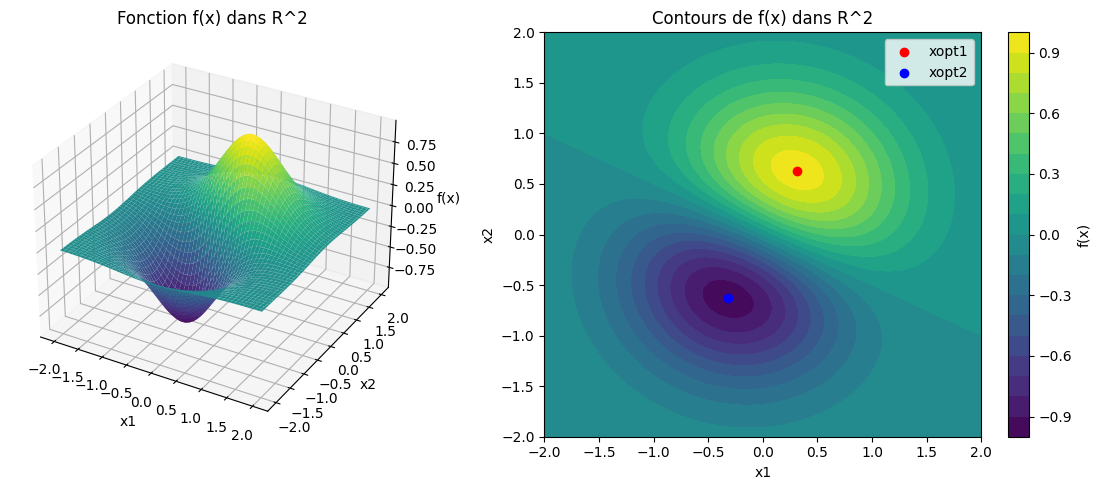


Descente de gradient à partir de xinit = xopt1 + perturbation :
Point minimisant trouvé : [1.59016146 2.11933333]
Valeur minimale de f(x) : 0.005208979653227407


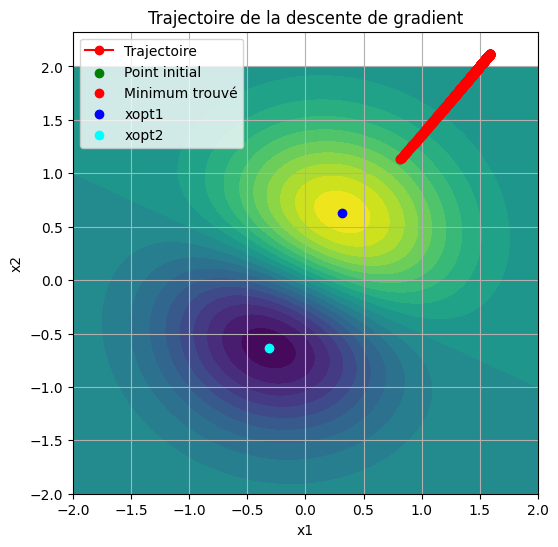

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Définition de la fonction f(x) = <x, y> * exp(-||x||^2)
def f(x, y):
    return np.dot(x, y) * np.exp(-np.linalg.norm(x)**2)

# Gradient analytique de f
def grad_f(x, y):
    norm_x_squared = np.linalg.norm(x)**2
    exp_term = np.exp(-norm_x_squared)
    return exp_term * (y - 2 * np.dot(x, y) * x)

# Gradient par différences finies
def finite_difference_gradient(f, x, y, eps=1e-5):
    grad = np.zeros_like(x)
    for i in range(len(x)):
        x_plus = x.copy()
        x_minus = x.copy()
        x_plus[i] += eps
        x_minus[i] -= eps
        grad[i] = (f(x_plus, y) - f(x_minus, y)) / (2 * eps)
    return grad

# Vérification du gradient
def check_gradient(x, y, eps=1e-5):
    grad_analytic = grad_f(x, y)
    grad_fd = finite_difference_gradient(f, x, y, eps)
    print("Gradient analytique :", grad_analytic)
    print("Gradient par différences finies :", grad_fd)
    print("Différence :", np.linalg.norm(grad_analytic - grad_fd))

# Descente de gradient
def gradient_descent(f, grad_f, x0, y, learning_rate=0.01, epsilon=1e-6, max_iter=1000):
    x = np.array(x0, dtype='float64')
    trajectory = [x.copy()]
    f_values = [f(x, y)]

    for niter in range(max_iter):
        grad = grad_f(x, y)
        grad_norm = np.linalg.norm(grad)

        if grad_norm < epsilon:
            print(f"Convergence atteinte après {niter} itérations.")
            break

        x -= learning_rate * grad
        trajectory.append(x.copy())
        f_values.append(f(x, y))

    return x, np.array(trajectory), np.array(f_values)

# Paramètres
ndim = 2
y = np.array([1.0, 2.0])

# Solutions théoriques : xopt = +/- y / (sqrt(2) * ||y||)
norm_y = np.linalg.norm(y)
xopt1 = y / (np.sqrt(2) * norm_y)
xopt2 = -y / (np.sqrt(2) * norm_y)

print("Solutions théoriques :")
print("xopt1 =", xopt1)
print("xopt2 =", xopt2)

# Vérification du gradient aux points optimaux
print("\nVérification du gradient en xopt1 :")
check_gradient(xopt1, y)

print("\nVérification du gradient en xopt2 :")
check_gradient(xopt2, y)

# Visualisation de f(x) dans R^2
x1 = np.linspace(-2, 2, 100)
x2 = np.linspace(-2, 2, 100)
X1, X2 = np.meshgrid(x1, x2)
Z = np.zeros_like(X1)

for i in range(X1.shape[0]):
    for j in range(X1.shape[1]):
        x = np.array([X1[i, j], X2[i, j]])
        Z[i, j] = f(x, y)

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X1, X2, Z, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x)')
ax.set_title('Fonction f(x) dans R^2')

# Contour plot
ax = fig.add_subplot(1, 2, 2)
contour = ax.contourf(X1, X2, Z, levels=20, cmap='viridis')
fig.colorbar(contour, ax=ax, label='f(x)')
ax.scatter(xopt1[0], xopt1[1], c='red', label='xopt1')
ax.scatter(xopt2[0], xopt2[1], c='blue', label='xopt2')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('Contours de f(x) dans R^2')
ax.legend()

plt.tight_layout()
plt.show()

# Descente de gradient à partir d'un point initial perturbé
perturbation = np.array([0.5, 0.5])
xinit = xopt1 + perturbation

print("\nDescente de gradient à partir de xinit = xopt1 + perturbation :")
x_min, trajectory, f_values = gradient_descent(f, grad_f, xinit, y, learning_rate=0.01, epsilon=1e-6)

print("Point minimisant trouvé :", x_min)
print("Valeur minimale de f(x) :", f(x_min, y))

# Tracer la trajectoire
plt.figure(figsize=(6, 6))
plt.contourf(X1, X2, Z, levels=20, cmap='viridis')
plt.plot(trajectory[:, 0], trajectory[:, 1], 'ro-', label='Trajectoire')
plt.scatter(xinit[0], xinit[1], c='green', label='Point initial')
plt.scatter(x_min[0], x_min[1], c='red', label='Minimum trouvé')
plt.scatter(xopt1[0], xopt1[1], c='blue', label='xopt1')
plt.scatter(xopt2[0], xopt2[1], c='cyan', label='xopt2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Trajectoire de la descente de gradient')
plt.legend()
plt.grid(True)
plt.show()


Comparaison de solution 

Solutions théoriques :
xopt1 = [0.31622777 0.63245553]
xopt2 = [-0.31622777 -0.63245553]

Vérification du gradient en xopt1 :
Gradient analytique : [0. 0.]
Gradient par différences finies : [0.00000000e+00 7.77156117e-11]
Différence : 7.771561172376096e-11

Vérification du gradient en xopt2 :
Gradient analytique : [0. 0.]
Gradient par différences finies : [0.00000000e+00 7.77156117e-11]
Différence : 7.771561172376096e-11

Descente de gradient à partir de xinit = xopt1 + perturbation :
Point minimisant trouvé : [1.59016146 2.11933333]
Valeur minimale de J(x) : 0.005208979653227407


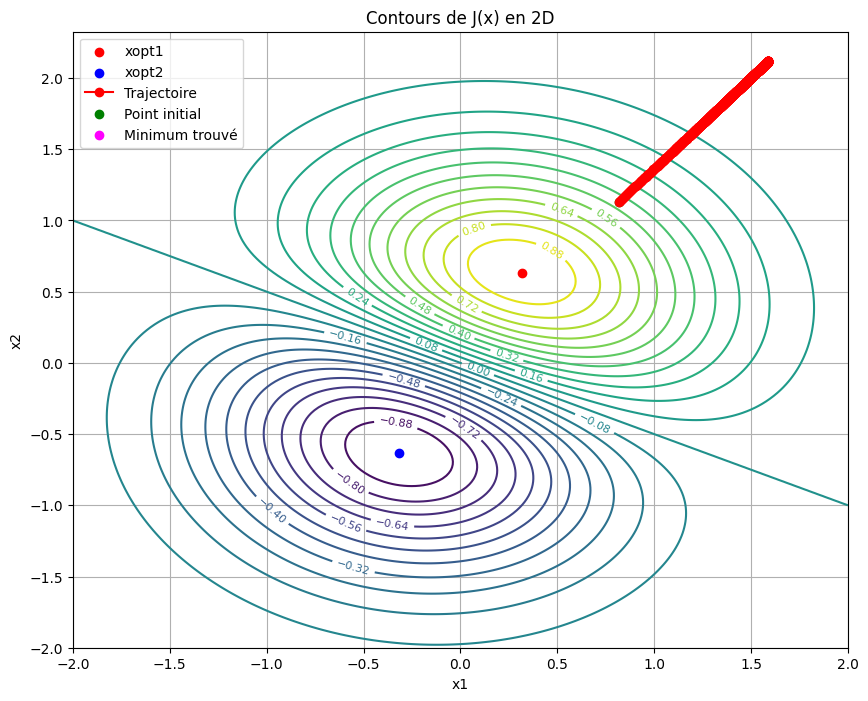

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Définition de la fonction J(x) = <x, y> * exp(-||x||^2)
def J(x, y):
    return np.dot(x, y) * np.exp(-np.linalg.norm(x)**2)

# Gradient analytique de J
def grad_J(x, y):
    norm_x_squared = np.linalg.norm(x)**2
    exp_term = np.exp(-norm_x_squared)
    return exp_term * (y - 2 * np.dot(x, y) * x)

# Gradient par différences finies
def finite_difference_gradient(J, x, y, eps=1e-5):
    ndim = len(x)
    grad = np.zeros(ndim)
    for i in range(ndim):
        ei = np.zeros(ndim)
        ei[i] = 1
        grad[i] = (J(x + eps * ei, y) - J(x - eps * ei, y)) / (2 * eps)
    return grad

# Vérification du gradient
def check_gradient(x, y, eps=1e-5):
    grad_analytic = grad_J(x, y)
    grad_fd = finite_difference_gradient(J, x, y, eps)
    print("Gradient analytique :", grad_analytic)
    print("Gradient par différences finies :", grad_fd)
    print("Différence :", np.linalg.norm(grad_analytic - grad_fd))

# Descente de gradient
def gradient_descent(J, grad_J, x0, y, learning_rate=0.01, epsilon=1e-6, max_iter=1000):
    x = np.array(x0, dtype='float64')
    trajectory = [x.copy()]
    J_values = [J(x, y)]

    for niter in range(max_iter):
        grad = grad_J(x, y)
        grad_norm = np.linalg.norm(grad)

        if grad_norm < epsilon:
            print(f"Convergence atteinte après {niter} itérations.")
            break

        x -= learning_rate * grad
        trajectory.append(x.copy())
        J_values.append(J(x, y))

    return x, np.array(trajectory), np.array(J_values)

# Paramètres
y = np.array([1.0, 2.0])

# Solutions théoriques : xopt = +/- y / (sqrt(2) * ||y||)
norm_y = np.linalg.norm(y)
xopt1 = y / (np.sqrt(2) * norm_y)
xopt2 = -y / (np.sqrt(2) * norm_y)

print("Solutions théoriques :")
print("xopt1 =", xopt1)
print("xopt2 =", xopt2)

# Vérification du gradient aux points optimaux
print("\nVérification du gradient en xopt1 :")
check_gradient(xopt1, y)

print("\nVérification du gradient en xopt2 :")
check_gradient(xopt2, y)

# Visualisation de J(x) en 2D
x1 = np.linspace(-2, 2, 200)
x2 = np.linspace(-2, 2, 200)
X1, X2 = np.meshgrid(x1, x2)
Z = np.zeros_like(X1)

for i in range(X1.shape[0]):
    for j in range(X1.shape[1]):
        x = np.array([X1[i, j], X2[i, j]])
        Z[i, j] = J(x, y)

plt.figure(figsize=(10, 8))

# Contour plot de J(x)
contour = plt.contour(X1, X2, Z, levels=30, cmap='viridis')
plt.clabel(contour, inline=True, fontsize=8)
plt.scatter(xopt1[0], xopt1[1], c='red', label='xopt1')
plt.scatter(xopt2[0], xopt2[1], c='blue', label='xopt2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Contours de J(x) en 2D')

# Descente de gradient à partir d'un point initial perturbé
perturbation = np.array([0.5, 0.5])
xinit = xopt1 + perturbation

print("\nDescente de gradient à partir de xinit = xopt1 + perturbation :")
x_min, trajectory, J_values = gradient_descent(J, grad_J, xinit, y, learning_rate=0.01, epsilon=1e-6)

print("Point minimisant trouvé :", x_min)
print("Valeur minimale de J(x) :", J(x_min, y))

# Tracer la trajectoire de la descente de gradient
plt.plot(trajectory[:, 0], trajectory[:, 1], 'ro-', label='Trajectoire')
plt.scatter(xinit[0], xinit[1], c='green', label='Point initial')
plt.scatter(x_min[0], x_min[1], c='magenta', label='Minimum trouvé')
plt.legend()
plt.grid(True)
plt.show()


Solutions théoriques en 1D :
topt1 = 1.5811388300841895
topt2 = -1.5811388300841895

Vérification de la dérivée en topt1 :
Dérivée analytique : -0.7341905474240578
Dérivée par différences finies : -0.7341905474134157
Différence : 1.0642042802544438e-11

Vérification de la dérivée en topt2 :
Dérivée analytique : -0.7341905474240578
Dérivée par différences finies : -0.7341905474134157
Différence : 1.0642042802544438e-11

Descente de gradient en 1D à partir de tinit = topt1 + perturbation :
Point minimisant trouvé en 1D : 2.6877866511541586
Valeur minimale de J_1d(t) : 0.0043797655770614055


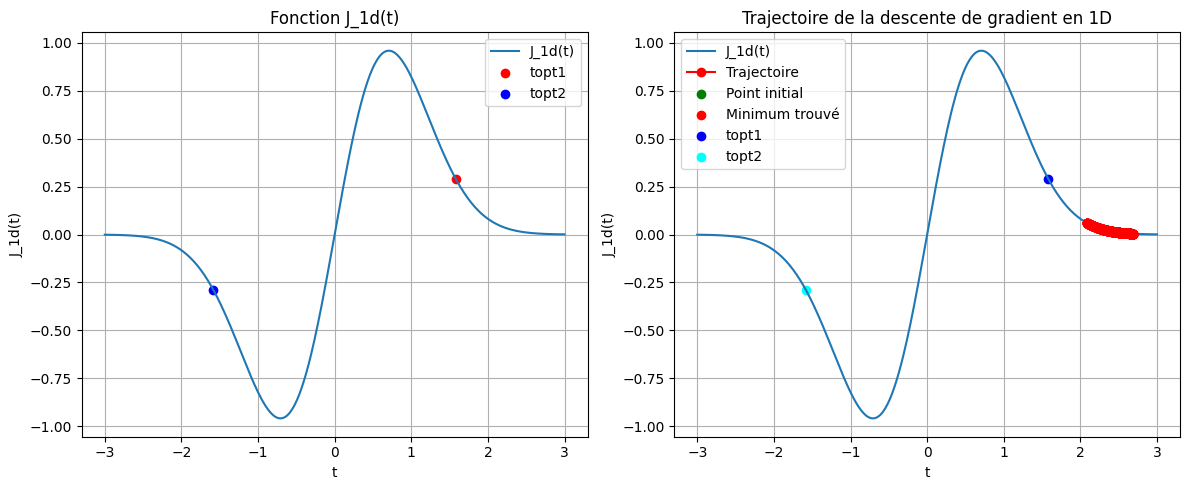

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres
y = np.array([1.0, 2.0])
norm_y = np.linalg.norm(y)
y_normalized = y / norm_y

# Définition de la fonction J en 1D le long de la direction de y
def J_1d(t, y):
    x = t * y_normalized
    return np.dot(x, y) * np.exp(-np.linalg.norm(x)**2)

# Dérivée analytique de J_1d
def dJ_1d(t, y):
    x = t * y_normalized
    norm_x_squared = np.linalg.norm(x)**2
    exp_term = np.exp(-norm_x_squared)
    grad = exp_term * (y - 2 * np.dot(x, y) * x)
    return np.dot(grad, y_normalized)

# Gradient par différences finies en 1D
def finite_difference_dJ_1d(J_1d, t, y, eps=1e-5):
    return (J_1d(t + eps, y) - J_1d(t - eps, y)) / (2 * eps)

# Vérification de la dérivée
def check_derivative(t, y, eps=1e-5):
    dJ_analytic = dJ_1d(t, y)
    dJ_fd = finite_difference_dJ_1d(J_1d, t, y, eps)
    print("Dérivée analytique :", dJ_analytic)
    print("Dérivée par différences finies :", dJ_fd)
    print("Différence :", abs(dJ_analytic - dJ_fd))

# Descente de gradient en 1D
def gradient_descent_1d(J_1d, dJ_1d, t0, y, learning_rate=0.01, epsilon=1e-6, max_iter=1000):
    t = t0
    trajectory = [t]
    J_values = [J_1d(t, y)]

    for niter in range(max_iter):
        grad = dJ_1d(t, y)
        grad_norm = abs(grad)

        if grad_norm < epsilon:
            print(f"Convergence atteinte après {niter} itérations.")
            break

        t -= learning_rate * grad
        trajectory.append(t)
        J_values.append(J_1d(t, y))

    return t, np.array(trajectory), np.array(J_values)

# Solutions théoriques en 1D : t_opt = +/- ||y|| / sqrt(2)
topt1 = norm_y / np.sqrt(2)
topt2 = -norm_y / np.sqrt(2)

print("Solutions théoriques en 1D :")
print("topt1 =", topt1)
print("topt2 =", topt2)

# Vérification de la dérivée aux points optimaux
print("\nVérification de la dérivée en topt1 :")
check_derivative(topt1, y)

print("\nVérification de la dérivée en topt2 :")
check_derivative(topt2, y)

# Visualisation de J_1d(t)
t_vals = np.linspace(-3, 3, 400)
J_vals = [J_1d(t, y) for t in t_vals]

plt.figure(figsize=(12, 5))

# Tracé de J_1d(t)
plt.subplot(1, 2, 1)
plt.plot(t_vals, J_vals, label='J_1d(t)')
plt.scatter(topt1, J_1d(topt1, y), c='red', label='topt1')
plt.scatter(topt2, J_1d(topt2, y), c='blue', label='topt2')
plt.xlabel('t')
plt.ylabel('J_1d(t)')
plt.title('Fonction J_1d(t)')
plt.legend()
plt.grid(True)

# Descente de gradient en 1D à partir d'un point initial perturbé
perturbation = 0.5
tinit = topt1 + perturbation

print("\nDescente de gradient en 1D à partir de tinit = topt1 + perturbation :")
t_min, trajectory, J_values = gradient_descent_1d(J_1d, dJ_1d, tinit, y, learning_rate=0.01, epsilon=1e-6)

print("Point minimisant trouvé en 1D :", t_min)
print("Valeur minimale de J_1d(t) :", J_1d(t_min, y))

# Tracer la trajectoire de la descente de gradient en 1D
plt.subplot(1, 2, 2)
plt.plot(t_vals, J_vals, label='J_1d(t)')
plt.plot(trajectory, [J_1d(t, y) for t in trajectory], 'ro-', label='Trajectoire')
plt.scatter(tinit, J_1d(tinit, y), c='green', label='Point initial')
plt.scatter(t_min, J_1d(t_min, y), c='red', label='Minimum trouvé')
plt.scatter(topt1, J_1d(topt1, y), c='blue', label='topt1')
plt.scatter(topt2, J_1d(topt2, y), c='cyan', label='topt2')
plt.xlabel('t')
plt.ylabel('J_1d(t)')
plt.title('Trajectoire de la descente de gradient en 1D')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
